Atalov S. (TSI AUCA)

Introduction to Machine Learning

---

# Bias–variance tradeoff. 
## Underfitting-Overfitting

---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

### 1. Dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/lobachevksy/teaching/main/fish_dataset.csv')
df.head()

,Weight,Length,Height,Width,Species
0,242.0,23.2,11.5200,4.0200,Bream
1,290.0,24.0,12.4800,4.3056,Bream
2,340.0,23.9,12.3778,4.6961,Bream
3,363.0,26.3,12.7300,4.4555,Bream
4,430.0,26.5,12.4440,5.1340,Bream


In [3]:
df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [4]:
X = df.copy()
y = X.pop('Species')

#### For simplicity let's look only at the 3 species:

In [5]:
X = X[ y.isin(['Bream', 'Perch', 'Whitefish']) ]
y = y[ y.isin(['Bream', 'Perch', 'Whitefish']) ]

#### Train Test Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### 2. Decision Tree Classifier


In [7]:
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

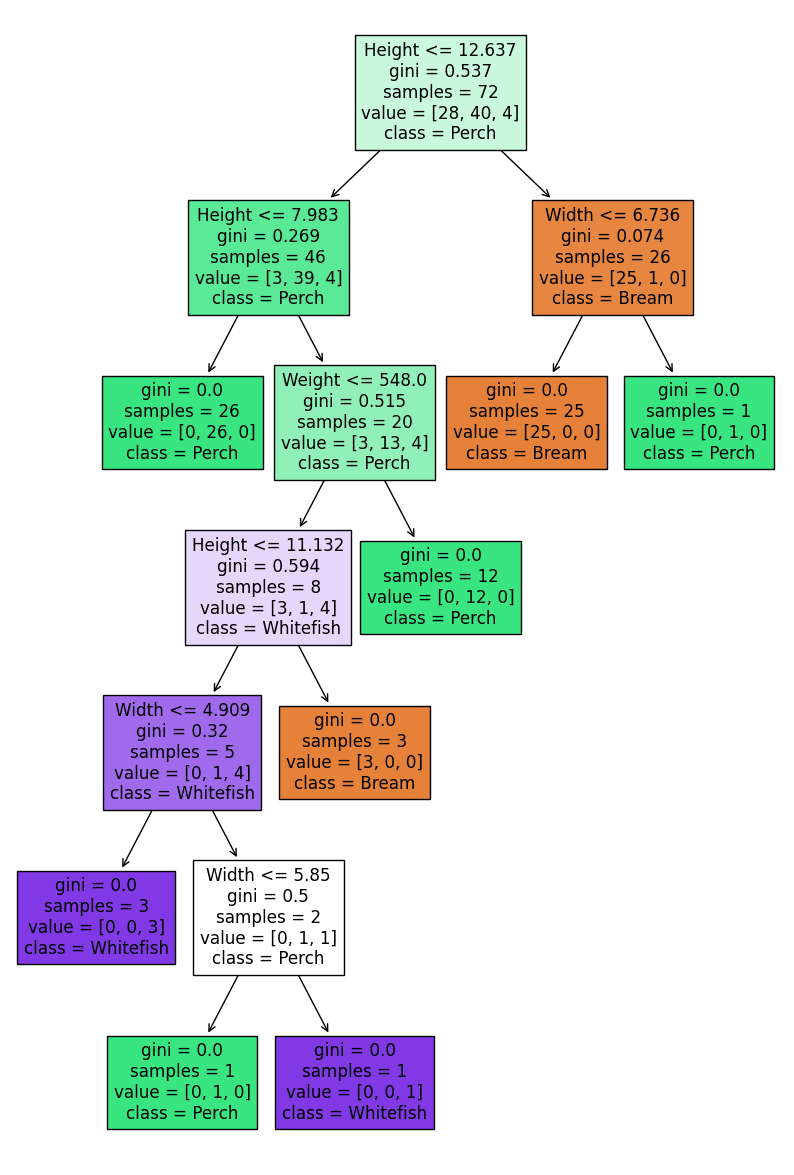

In [8]:
fig = plt.figure(figsize=(10, 15))
_ = plot_tree(
    model,
    feature_names=['Weight', 'Length', 'Height', 'Width'],
    class_names=['Bream', 'Perch', 'Whitefish'],
    filled=True,
)

### Overfitting?

In [9]:
model.score(X_train, y_train)

1.0

In [12]:
model.score(X_test, y_test)

0.8

### 3. Overfitting vs Underfitting

In [14]:
model_2 = DecisionTreeClassifier(max_depth = 9, random_state=0)

model_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, random_state=0)

In [15]:
model_2.score(X_train, y_train)

1.0

In [16]:
model_2.score(X_test, y_test)

0.8

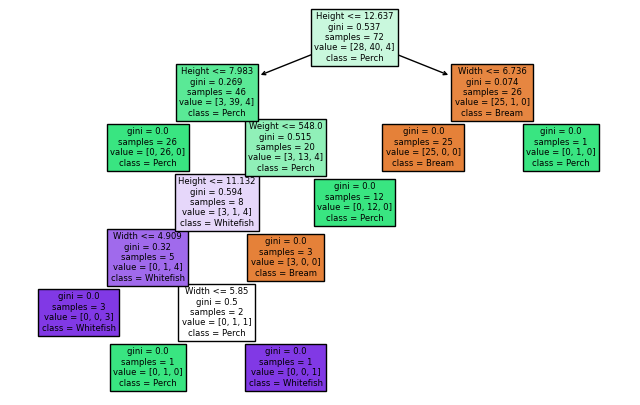

In [17]:
fig = plt.figure(figsize=(8, 5))
_ = plot_tree(
    model_2,
    feature_names=['Weight', 'Length', 'Height', 'Width'],
    class_names=['Bream', 'Perch', 'Whitefish'],
    filled=True,
)

In [18]:
y.value_counts()

Perch        56
Bream        35
Whitefish     6
Name: Species, dtype: int64